## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來

Titanic_Test = 'Titanic_test.csv'
Titanic_Train = 'Titanic_train.csv'
test_data = pd.read_csv(Titanic_Test)
train_data = pd.read_csv(Titanic_Train)
df_test = pd.DataFrame(test_data)
df_train = pd.DataFrame(train_data)

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# display(df_train.head(1))
# display(df_test.head(1))
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## A1 : 少了Survived欄位  Test 資料集沒有 'Survived' 

## Q2: 測試資料集是否有遺失值?

In [6]:
#可以嘗試用範例的程式
print("判断哪些”列”存在缺失值")
print(df_train.isnull().any())
print("A2 : 有%d個列存在遺失值，分別是： Cabin, Embarked, Age"%df_train.isnull().any().sum())

判断哪些”列”存在缺失值
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
A2 : 有3個列存在遺失值，分別是： Cabin, Embarked, Age


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

age平均 29
age標準差 14


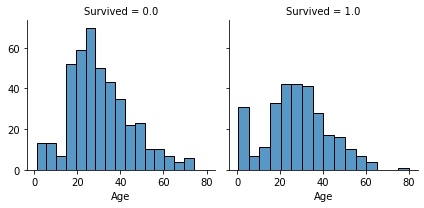

In [7]:
#合併資料
#合併資料
df = pd.concat([df_train, df_test], ignore_index=True)
#補值前 平均值
print("age平均 %d" % df['Age'].mean())
print("age標準差 %d" % df['Age'].std())
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age', kde=False)

In [8]:
# #補值後
# df = pd.read_csv("Titanic_train.csv")
# df['Age']=df['Age'].fillna(method='pad')
# print("age平均 %d" % df['Age'].mean())
# print("age標準差 %d" % df['Age'].std())
# # df_train[df_train['Age'].isnull().values==True]
# # 連續型用分布圖行來看
# g = sns.FacetGrid(df, col='Survived')
# g.map(sns.histplot, 'Age', kde=False)

# #補值後
# df = pd.read_csv("Titanic_train.csv")
# df['Age']=df['Age'].fillna(method='bfill')
# print("age平均 %d" % df['Age'].mean())
# print("age標準差 %d" % df['Age'].std())
# # 連續型用分布圖行來看
# g = sns.FacetGrid(df, col='Survived')
# g.map(sns.histplot, 'Age', kde=False)
# from natsort import natsorted
# # df = df.reindex(natsorted(df_train.Cabin))
# display(df[df['Cabin'].notnull()].sort_values(["Cabin", "Age", "Name"]))

In [9]:
# print(df_train['Cabin'].unique())
print(df["Cabin"].value_counts())
np.sum(df['Cabin'].isnull())

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
F33                4
                  ..
C51                1
D48                1
D34                1
D6                 1
D38                1
Name: Cabin, Length: 186, dtype: int64


1014

In [14]:
df["CabinClass"] = df["Cabin"].str[0].fillna("Unknown")

In [16]:
df.groupby('CabinClass', as_index=False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)

,CabinClass,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,Unknown,0.299854
7,T,0.000000
